In [ ]:
# import required librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset and show its properties

In [ ]:
# read the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
# replace white spaces with underscore in df columns
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.test_preparation_course.value_counts()

none         642
completed    359
Name: test_preparation_course, dtype: int64

In [ ]:
# show df properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1001 non-null   object
 3   lunch                        1001 non-null   object
 4   test_preparation_course      1001 non-null   object
 5   math_score                   1001 non-null   int64 
 6   reading_score                1001 non-null   int64 
 7   writing_score                1001 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.7+ KB


There are 8 columns and 1001 rows.

# Data Cleaning

In [ ]:
# number of duplicate in dataset
df.duplicated().sum()

1

In [ ]:
# remove duplicate
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [ ]:
# fix missing data
df.isna().sum()

gender                         1
race/ethnicity                 1
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

we have two rows with missing data in gender and race/ethnicity columns



In [ ]:
# show rows with missing data
df[df.isna().any(axis=1)]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
8,NaN,group D,high school,free/reduced,completed,64,64,67
12,female,NaN,high school,standard,none,65,81,73


I will drop the two rows with missing data

In [ ]:
# drop missing data
df.dropna(inplace=True)

# Provide descriptive statistics of the dataset and perform an
#exploratory data analysis (EDA)


In [ ]:
# descriptive statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,998.000000,998.000000,998.000000
mean,66.092184,69.162325,68.050100
std,15.178097,14.609106,15.210047
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.250000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


### Compare students’ exam scores in different variables (math, reading, writing)


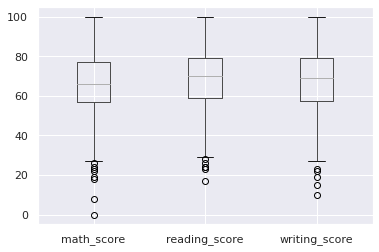

In [ ]:
# plot the df columns
df.boxplot()

There is no outliers in the data


,math_score,reading_score,writing_score
math_score,1.000000,0.817919,0.802710
reading_score,0.817919,1.000000,0.954736
writing_score,0.802710,0.954736,1.000000


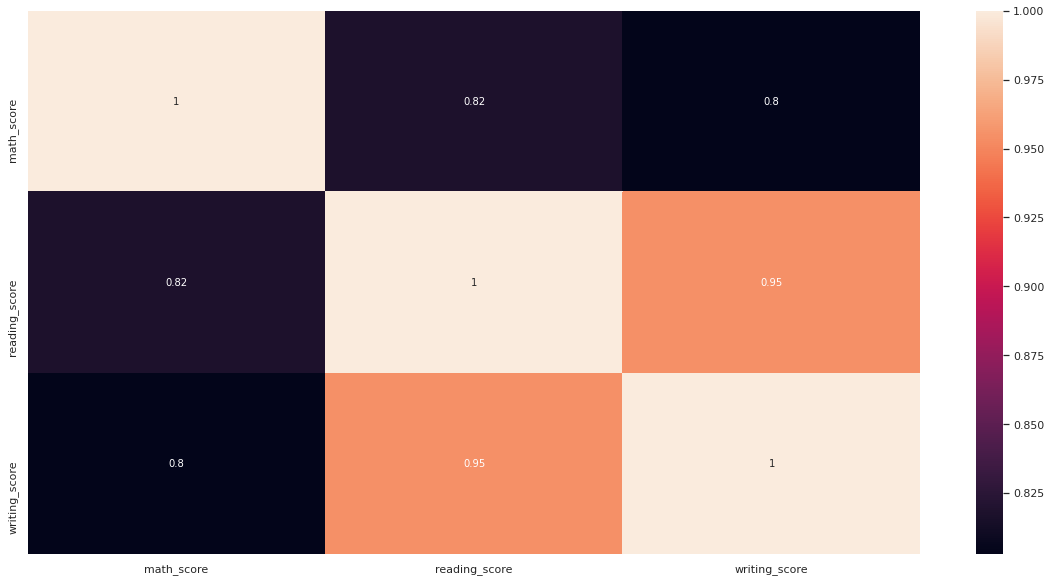

In [ ]:
# finding the relations between the variables with heatmap
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,annot=True)
c

We can see that students’ exam scores are very much similer for the diffrent courses. Math has the lowest mean. Reading and writing have a strong postive correlation

###Who performed better in different subjects male or female students?


In [ ]:
# male and female scores in different courses
df.groupby(['gender']).mean()

,math_score,reading_score,writing_score
gender,,,
female,63.630561,72.591876,72.466151
male,68.738046,65.476091,63.303534


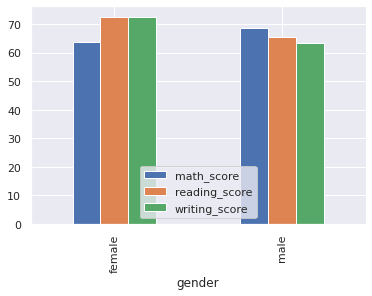

In [ ]:
# plot male and female scores in different courses
df.groupby(['gender']).mean().plot(kind='bar')

We can see that on average, male have higher scores in math. Females have higher scores in reading and writing.





###Show any attributes (features) that are correlated with exam scores.

In [ ]:
df.sample(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
817,female,group A,bachelor's degree,standard,none,45,59,64
299,male,group C,high school,free/reduced,completed,40,46,50
532,female,group C,some high school,standard,none,47,54,53
952,female,group D,some college,standard,completed,75,77,83
328,male,group A,some college,free/reduced,none,28,23,19


In [ ]:
# correlation between parental_level_of_education and courses scores
df.groupby(['parental_level_of_education']).mean()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.113402,64.623711,62.371134
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


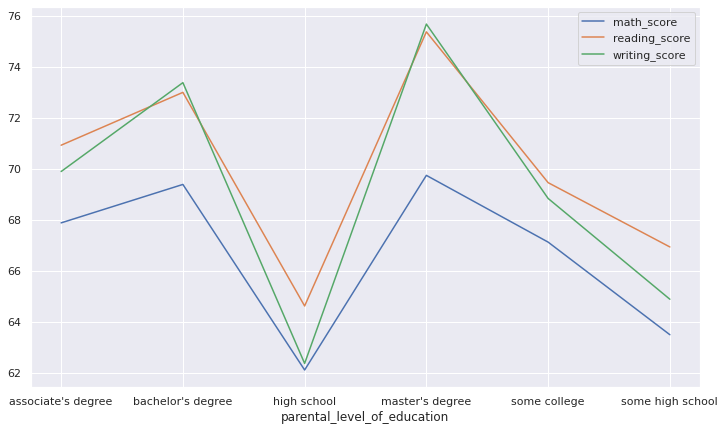

In [ ]:
# plot correlation between parental_level_of_education and courses scores
df.groupby(['parental_level_of_education']).mean().plot(figsize=(12,7))

We can see that the parental level of education is affecting their children exam
scores. When the parental have a higher education level, their childern have higher average exam scores.

###Does test preparation influence students’ performance?)


In [ ]:
# correlation between test_preparation_course and courses scores
df.groupby(['test_preparation_course']).mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.711485,73.921569,74.439776
none,64.076443,66.511700,64.491420


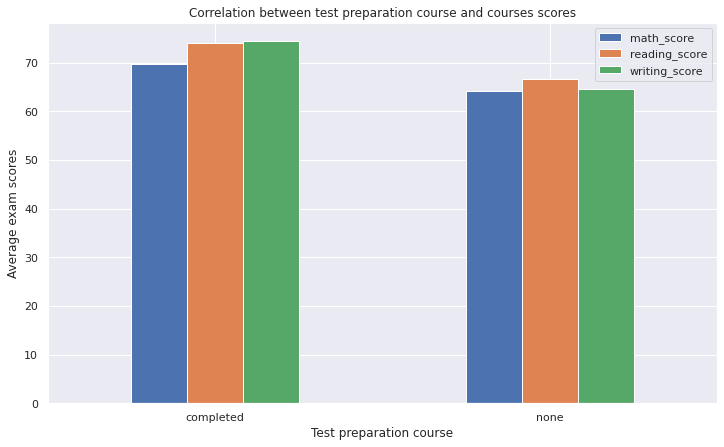

In [ ]:
# plot correlation between test_preparation_course and courses scores
df.groupby(['test_preparation_course']).mean().plot(kind='bar', figsize=(12,7), rot=0)
plt.title('Correlation between test preparation course and courses scores')
plt.ylabel('Average exam scores')
plt.xlabel('Test preparation course');

We can see that the students who compeleted the test preparation course have a higher average exam scores.

In [ ]:
# correlation between lunch and courses scores
df.groupby(['lunch']).mean()

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.906780,64.655367,63.011299
standard,70.041925,71.639752,70.819876


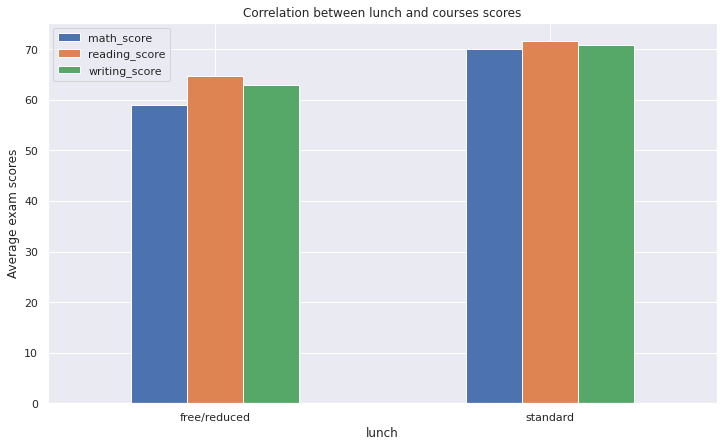

In [ ]:
# plot correlation between lunch and courses scores
df.groupby(['lunch']).mean().plot(kind='bar', figsize=(12,7), rot=0)
plt.title('Correlation between lunch and courses scores')
plt.ylabel('Average exam scores')
plt.xlabel('lunch');

We can see that the students who eat standerd lunch have a higher average exam scores

In [ ]:
df['race/ethnicity'].value_counts()

group C    319
group D    261
group B    189
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [ ]:
# correlation between race/ethnicity and courses scores
df.groupby(['race/ethnicity']).mean()

,math_score,reading_score,writing_score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.444444,67.280423,65.560847
group C,64.463950,69.103448,67.827586
group D,67.375479,70.053640,70.157088
group E,73.821429,73.028571,71.407143


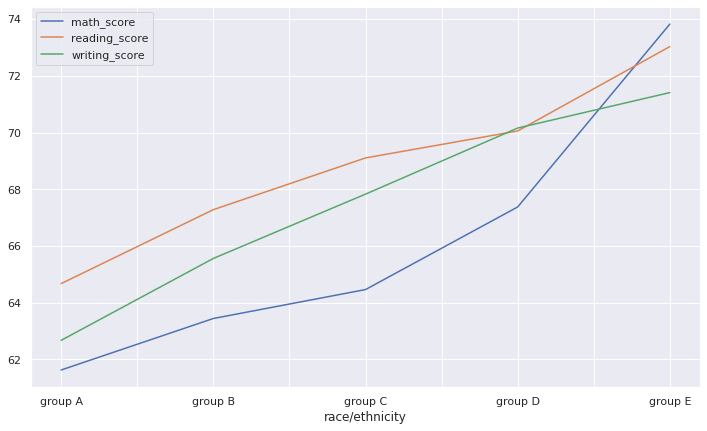

In [ ]:
# plot correlation between race/ethnicity and courses scores
df.groupby(['race/ethnicity']).mean().plot(figsize=(12,7))

It's clear that the race/ethnicity have an effect on the exam scores. group A have the lowest average exam scores and group E have the highest average exam scores.

#Build a machine learning model

###Machine learning model to predict student’s exam performance in math.
###dependent variable: math score
###independent variables: gender, race/ethnicity, parental level of education, lunch, and test preparation course.
###I will use multiple linear regression model in sklearn library



I will create a mapping of the sortable categories in race/ethnicity column

In [ ]:
# Numbers for ordinal data in race/ethnicity column
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].cat.reorder_categories(['group A', 'group B', 'group C', 'group D', 'group E'], ordered=True)
df['race/ethnicity'] = df['race/ethnicity'].cat.codes
print(df['race/ethnicity'])

0       1
1       2
2       1
3       0
4       2
       ..
996     4
997     2
998     2
999     3
1000    3
Name: race/ethnicity, Length: 998, dtype: int8


In [ ]:
# get dummies for the other categorical columns
ml_df = pd.get_dummies(df, drop_first=True)

In [ ]:
# dependent and independent variable
x = ml_df.drop(['math_score'],axis=1)
y = ml_df['math_score']
# splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, y_train.shape

((798, 11), (798,))

In [ ]:
# training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predict
y_predict = lm.predict(X_test)
expected = y_test
for p, e in zip(y_predict[::5], expected[::5]):
  print(f'predicted: {p}, expected: {e}')

predicted: 60.47322181336706, expected: 61
predicted: 70.05915253065052, expected: 71
predicted: 59.57949106565677, expected: 57
predicted: 102.06376744474314, expected: 100
predicted: 82.77259766326668, expected: 87
predicted: 78.77452345321865, expected: 77
predicted: 64.92472345671602, expected: 74
predicted: 93.00522365104305, expected: 96
predicted: 84.25413322303045, expected: 88
predicted: 61.949464416368784, expected: 70
predicted: 64.73114193320185, expected: 70
predicted: 53.35502702489741, expected: 59
predicted: 54.06041474101443, expected: 49
predicted: 71.47001505107404, expected: 69
predicted: 48.33648883235926, expected: 40
predicted: 57.9245777955949, expected: 55
predicted: 68.44288774462983, expected: 62
predicted: 76.38510692955903, expected: 77
predicted: 66.33516590080706, expected: 59
predicted: 66.78233204948702, expected: 60
predicted: 74.19135647811247, expected: 76
predicted: 51.68006387384846, expected: 45
predicted: 74.41977228177363, expected: 78
predicted

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))

Mean squared error: 30.85
Coefficient of determination: 0.85


Visualizing the Expected vs. Predicted Math scores


In [ ]:
m1_df = pd.DataFrame()
m1_df['expected'] = y_test
m1_df['predicted'] = y_predict

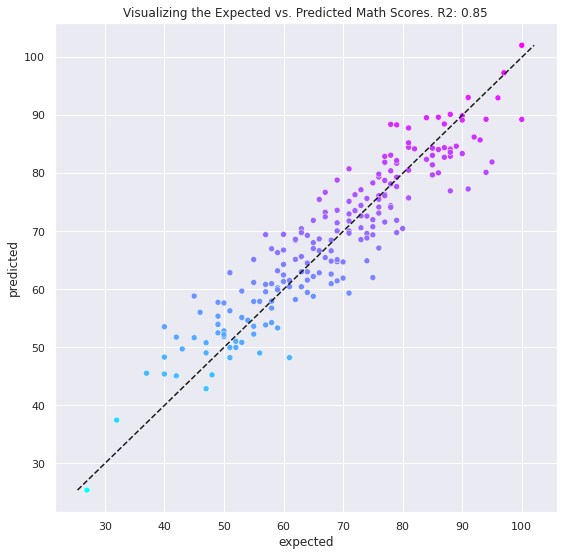

In [ ]:
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=m1_df, x='expected', y='predicted',
                       hue='predicted', palette='cool', legend=False, )
start = min(m1_df.expected.min(), m1_df.predicted.min())
end = max(m1_df.expected.max(), m1_df.predicted.max())
plt.title(f'Visualizing the Expected vs. Predicted Math Scores. R2: %.2f'
      % r2_score(y_test, y_predict))
line = plt.plot([start, end], [start, end], 'k--')

###Machine learning model to predict student’s exam performance in reading.
###dependent variable: math score
###independent variables: gender, race/ethnicity, parental level of education, lunch, and test preparation course.
###I will use multiple linear regression model in sklearn library

In [ ]:
# dependent and independent variable
x = ml_df.drop(['reading_score'],axis=1)
y = ml_df['reading_score']
# splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, y_train.shape

((798, 11), (798,))

In [ ]:
ml_df.head()

,race/ethnicity,math_score,reading_score,writing_score,gender_male,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,1,72,72,74,0,1,0,0,0,0,1,1
1,2,69,90,88,0,0,0,0,1,0,1,0
2,1,90,95,93,0,0,0,1,0,0,1,1
3,0,47,57,44,1,0,0,0,0,0,0,1
4,2,76,78,75,1,0,0,0,1,0,1,1


In [ ]:
# training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predict
y_predict = lm.predict(X_test)
expected = y_test
for p, e in zip(y_predict[::5], expected[::5]):
  print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 81.71, expected: 81.00
predicted: 52.27, expected: 54.00
predicted: 64.31, expected: 64.00
predicted: 73.12, expected: 74.00
predicted: 54.16, expected: 50.00
predicted: 74.34, expected: 76.00
predicted: 69.81, expected: 69.00
predicted: 75.57, expected: 66.00
predicted: 77.70, expected: 77.00
predicted: 71.20, expected: 74.00
predicted: 71.89, expected: 70.00
predicted: 78.76, expected: 80.00
predicted: 80.72, expected: 79.00
predicted: 81.39, expected: 81.00
predicted: 77.20, expected: 76.00
predicted: 49.59, expected: 46.00
predicted: 97.70, expected: 100.00
predicted: 59.35, expected: 51.00
predicted: 72.51, expected: 68.00
predicted: 61.78, expected: 50.00
predicted: 57.56, expected: 56.00
predicted: 58.27, expected: 58.00
predicted: 76.45, expected: 81.00
predicted: 31.95, expected: 38.00
predicted: 69.79, expected: 70.00
predicted: 67.52, expected: 67.00
predicted: 64.93, expected: 65.00
predicted: 55.51, expected: 52.00
predicted: 83.07, expected: 82.00
predicted: 73

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))

Mean squared error: 15.51
Coefficient of determination: 0.92


Visualizing the Expected vs. Predicted reading scores


In [ ]:
m1_df = pd.DataFrame()
m1_df['expected'] = y_test
m1_df['predicted'] = y_predict

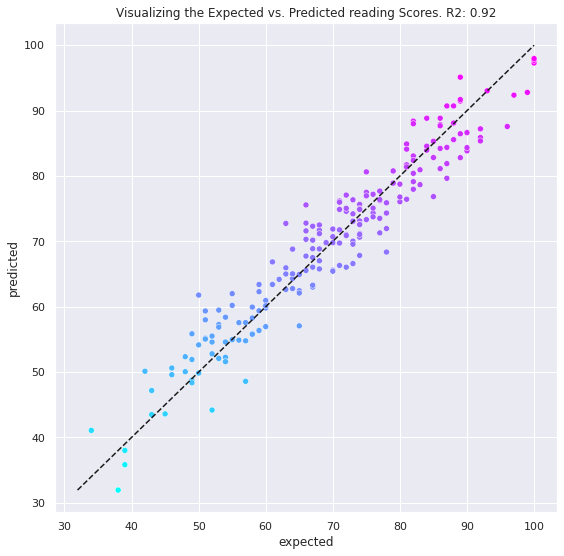

In [ ]:
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=m1_df, x='expected', y='predicted',
                       hue='predicted', palette='cool', legend=False, )
start = min(m1_df.expected.min(), m1_df.predicted.min())
end = max(m1_df.expected.max(), m1_df.predicted.max())
plt.title('Visualizing the Expected vs. Predicted reading Scores. R2: %.2f'
      % r2_score(y_test, y_predict))
line = plt.plot([start, end], [start, end], 'k--')

###Machine learning model to predict student’s exam performance in writing.
###dependent variable: writing score
###independent variables: gender, race/ethnicity, parental level of education, lunch, and test preparation course, math score, reading score.
###I will use multiple linear regression model in sklearn library

In [ ]:
# dependent and independent variable
x = ml_df.drop(['writing_score'],axis=1)
y = ml_df['writing_score']
# splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, y_train.shape

((798, 11), (798,))

In [ ]:
# training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predict
y_predict = lm.predict(X_test)
expected = y_test
for p, e in zip(y_predict[::5], expected[::5]):
  print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 47.67, expected: 47.00
predicted: 81.80, expected: 78.00
predicted: 95.70, expected: 93.00
predicted: 66.03, expected: 72.00
predicted: 35.82, expected: 34.00
predicted: 98.41, expected: 100.00
predicted: 83.50, expected: 89.00
predicted: 76.48, expected: 76.00
predicted: 83.98, expected: 81.00
predicted: 58.55, expected: 59.00
predicted: 75.99, expected: 73.00
predicted: 62.20, expected: 67.00
predicted: 62.47, expected: 62.00
predicted: 73.16, expected: 78.00
predicted: 50.85, expected: 50.00
predicted: 53.58, expected: 52.00
predicted: 63.10, expected: 68.00
predicted: 62.38, expected: 67.00
predicted: 49.51, expected: 46.00
predicted: 74.66, expected: 78.00
predicted: 64.56, expected: 69.00
predicted: 79.70, expected: 80.00
predicted: 76.11, expected: 81.00
predicted: 65.59, expected: 67.00
predicted: 56.92, expected: 60.00
predicted: 54.93, expected: 54.00
predicted: 48.83, expected: 53.00
predicted: 76.71, expected: 79.00
predicted: 69.43, expected: 68.00
predicted: 58

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_predict))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_predict))

Mean squared error: 13.53
Coefficient of determination: 0.95


Visualizing the Expected vs. Predicted writing scores


In [ ]:
m1_df = pd.DataFrame()
m1_df['expected'] = y_test
m1_df['predicted'] = y_predict

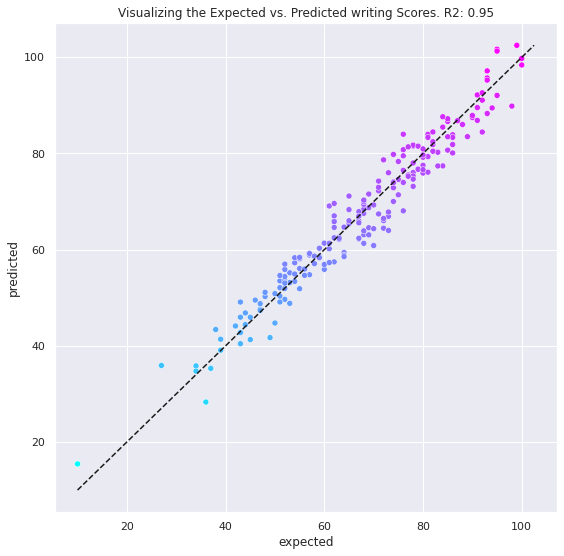

In [ ]:
figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=m1_df, x='expected', y='predicted',
                       hue='predicted', palette='cool', legend=False, )
start = min(m1_df.expected.min(), m1_df.predicted.min())
end = max(m1_df.expected.max(), m1_df.predicted.max())
plt.title('Visualizing the Expected vs. Predicted writing Scores. R2: %.2f'
      % r2_score(y_test, y_predict))
line = plt.plot([start, end], [start, end], 'k--')

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
estimators = {
'LinearRegression': lm,
'ElasticNet': ElasticNet(),
'Lasso': Lasso(),
'Ridge': Ridge()
}

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object,
                           X=x, y=y, cv=kfold,
                           scoring='r2')
  print(f'{estimator_name:>16}: ' +
        f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.941
      ElasticNet: mean of r2 scores=0.912
           Lasso: mean of r2 scores=0.909
           Ridge: mean of r2 scores=0.941
